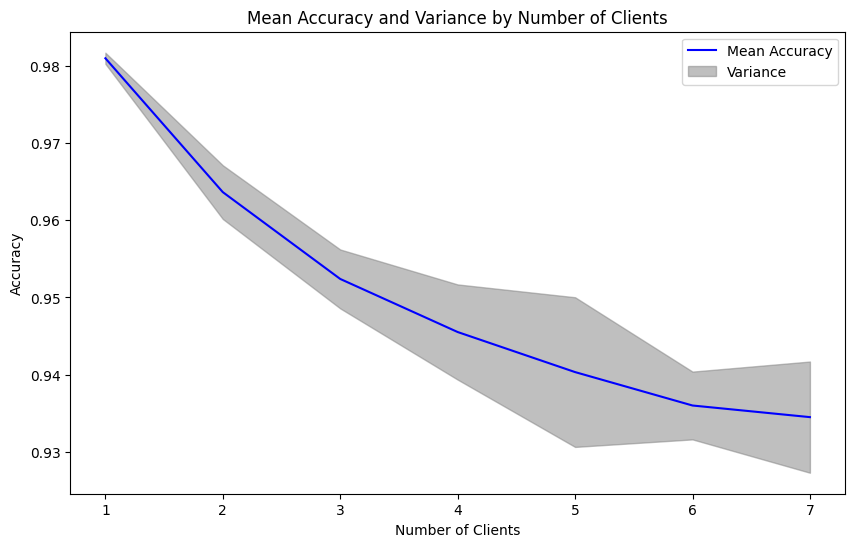

In [5]:
# Plot the mean accuracy and variance of the federated learning model by number of clients

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/mono_vs_federated copy.txt', header=None)

# Extract the number of clients and accuracies
num_clients = data[0]
accuracies = data.iloc[:, 1:]

# Calculate the mean and variance for each number of clients
mean_accuracies = accuracies.mean(axis=1)
variance_accuracies = accuracies.var(axis=1)

# Group by the number of clients
grouped_means = mean_accuracies.groupby(num_clients).mean()
grouped_variances = variance_accuracies.groupby(num_clients).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped_means.index, grouped_means, label='Mean Accuracy', color='blue')

# Plot variance as grey background
plt.fill_between(grouped_means.index, 
                 grouped_means - np.sqrt(grouped_variances), 
                 grouped_means + np.sqrt(grouped_variances), 
                 color='grey', alpha=0.5, label='Variance')

plt.xlabel('Number of Clients')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy and Variance by Number of Clients')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/accuracy_plot.pdf')

plt.show()

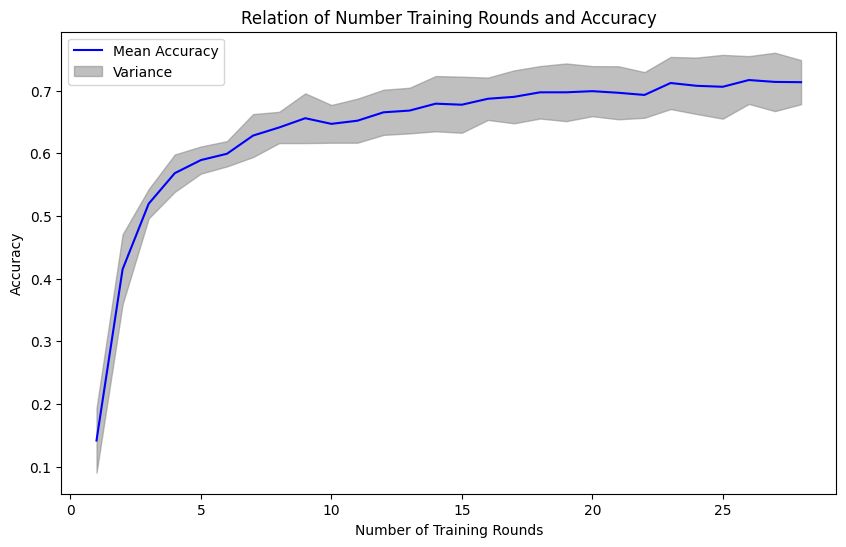

In [62]:
# Plot the mean accuracy and variance of the federated learning model by number of clients

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/local_numbers.txt', header=None)

# Extract the number of clients and accuracies
num_clients = data[0]
accuracies = data.iloc[:, 1:]

# Calculate the mean and variance for each number of clients
mean_accuracies = accuracies.mean(axis=1)
variance_accuracies = accuracies.var(axis=1)

# Group by the number of clients
grouped_means = mean_accuracies.groupby(num_clients).mean()
grouped_variances = variance_accuracies.groupby(num_clients).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped_means.index, grouped_means, label='Mean Accuracy', color='blue')

# Plot variance as grey background
plt.fill_between(grouped_means.index, 
                 grouped_means - np.sqrt(grouped_variances), 
                 grouped_means + np.sqrt(grouped_variances), 
                 color='grey', alpha=0.5, label='Variance')

plt.xlabel('Number of Training Rounds')
plt.ylabel('Accuracy')
plt.title('Relation of Number Training Rounds and Accuracy')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/local_numbers_plot.pdf')

plt.show()

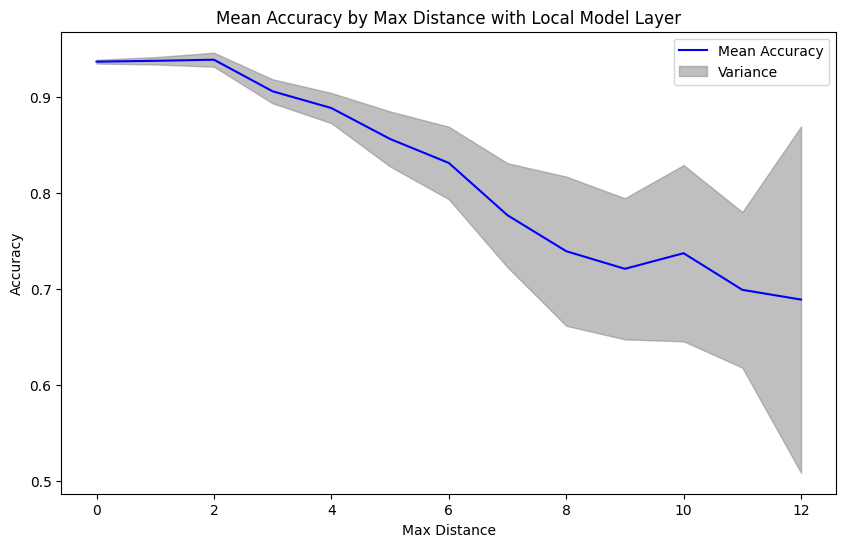

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/random_means_local.txt', header=None)

# Extract the columns
max_distance = data[0]
accuracy = data[1]

# Create a DataFrame
df = pd.DataFrame({'Max Distance': max_distance, 'Accuracy': accuracy})

# Group by Max Distance, then calculate the mean and variance of accuracy
grouped_local = df.groupby('Max Distance').agg(['mean', 'var']).reset_index()
grouped_local.columns = ['Max Distance', 'Mean Accuracy', 'Variance']

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped_local['Max Distance'], grouped_local['Mean Accuracy'], label='Mean Accuracy', color='blue')

# Plot variance as grey background
plt.fill_between(grouped_local['Max Distance'], 
                 grouped_local['Mean Accuracy'] - np.sqrt(grouped_local['Variance']), 
                 grouped_local['Mean Accuracy'] + np.sqrt(grouped_local['Variance']), 
                 color='grey', alpha=0.5, label='Variance')

plt.xlabel('Max Distance')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy by Max Distance with Local Model Layer')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/random_means__local_plot.pdf')

plt.show()

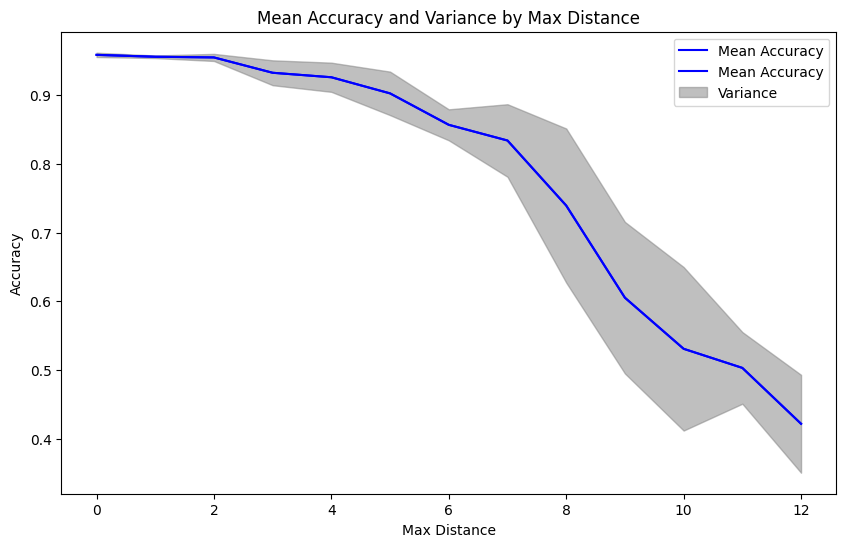

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/random_means.txt', header=None)

# Extract the columns
max_distance = data[0]
accuracy = data[1]

# Create a DataFrame
df = pd.DataFrame({'Max Distance': max_distance, 'Accuracy': accuracy})

# Group by Max Distance, then calculate the mean and variance of accuracy
grouped = df.groupby('Max Distance').agg(['mean', 'var']).reset_index()
grouped.columns = ['Max Distance', 'Mean Accuracy', 'Variance']

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped['Max Distance'], grouped['Mean Accuracy'], label='Mean Accuracy', color='blue')
plt.plot(grouped['Max Distance'], grouped['Mean Accuracy'], label='Mean Accuracy', color='blue')

# Plot variance as grey background
plt.fill_between(grouped['Max Distance'], 
                 grouped['Mean Accuracy'] - np.sqrt(grouped['Variance']), 
                 grouped['Mean Accuracy'] + np.sqrt(grouped['Variance']), 
                 color='grey', alpha=0.5, label='Variance')

plt.xlabel('Max Distance')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy and Variance by Max Distance')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/random_means_plot.pdf')

plt.show()

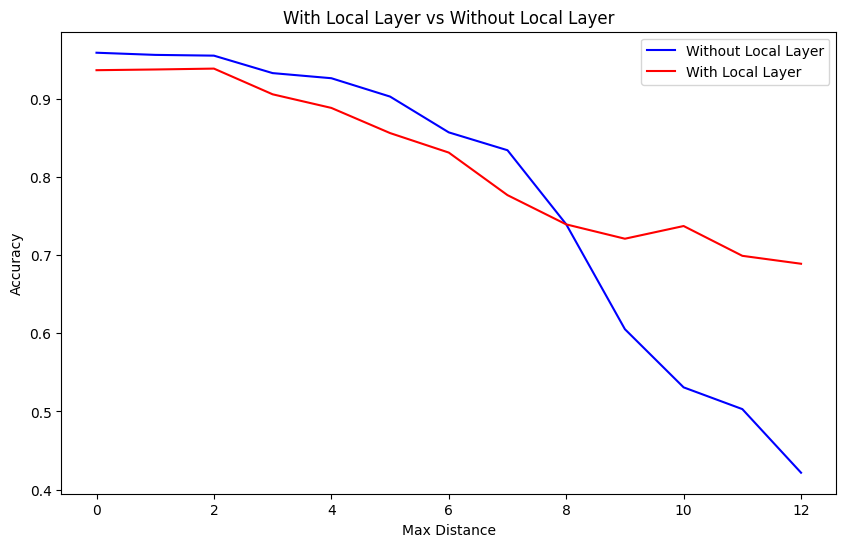

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped['Max Distance'], grouped['Mean Accuracy'], label='Without Local Layer', color='blue')
plt.plot(grouped_local['Max Distance'], grouped_local['Mean Accuracy'], label='With Local Layer', color='red')


plt.xlabel('Max Distance')
plt.ylabel('Accuracy')
plt.title('With Local Layer vs Without Local Layer')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/random_means_vs_local_plot.pdf')

plt.show()

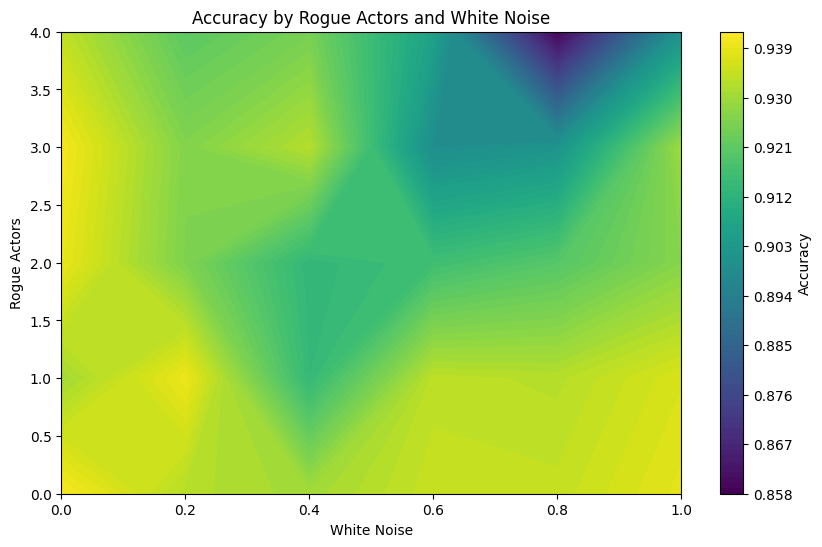

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/rogue_actors.txt', header=None)

# Extract the columns
rogue_actors = data[0]
white_noise = data[1]
accuracy = data[2]

# Create a DataFrame
df = pd.DataFrame({'Rogue Actors': rogue_actors, 'White Noise': white_noise, 'Accuracy': accuracy})

# Group by Rogue Actors and White Noise, then calculate the mean accuracy
grouped = df.groupby(['Rogue Actors', 'White Noise']).mean().reset_index()

# Pivot the DataFrame to create a 2D grid
pivot_table = grouped.pivot_table(index='Rogue Actors', columns='White Noise', values='Accuracy')

# Create meshgrid for contourf
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)

# Plot the results
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, pivot_table, cmap='viridis', levels=100)
plt.colorbar(contour, label='Accuracy')

plt.xlabel('White Noise')
plt.ylabel('Rogue Actors')
plt.title('Accuracy by Rogue Actors and White Noise')

# Save the plot as a PDF
plt.savefig('plots/rogue_actors_plot.pdf')

plt.show()

In [13]:
import torch


skip_layer = False
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        if(skip_layer):
            self.skip_layer = nn.Linear(16 * 4 * 4, 120)
            self.fc1 = nn.Linear(120, 120)
        else:
            self.fc1 = nn.Linear(16 * 4 * 4, 120)
            
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        if(skip_layer):
            x = torch.relu(self.skip_layer(x))
            
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [64]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torch

class ShiftedMNIST(Dataset):
    def __init__(self, root, train=True, download=True, transform=None, shift_x=0, shift_y=0):
        self.mnist = datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.shift_x = shift_x
        self.shift_y = shift_y

    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, idx):
        img, label = self.mnist[idx]
        img = np.array(img)
        img = np.roll(img, int(self.shift_y), axis=0)  # Shift along height
        img = np.roll(img, int(self.shift_x), axis=1)  # Shift along width
        img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)  # Convert back to tensor and add channel dimension
        return img, label


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

device = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = torch.device(device)  # Try "cuda" to train on GPU

round_num = 4
cid = 2
aggregate = True

model = Net().to(DEVICE)
m = torch.load(f"models/client-30-2.pth", map_location=DEVICE, weights_only=True)
model.load_state_dict(m)

transform = transforms.ToTensor()
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)[4]
mnist_loader = torch.utils.data.DataLoader([mnist_dataset], batch_size=1, shuffle=True)
print(mnist_dataset)
shift_x, shift_y = 5, 5
# img = np.array(img) 
# img = np.roll(img, int(shift_y), axis=2) # Shift along height 
# img = np.roll(img, int(shift_x), axis=1) # Shift along width

# Get a batch of test data
data_iter = iter(mnist_loader)
images, labels = next(data_iter)
input_tensor = images.to(DEVICE)

# Define the target layers for GradCAM

target_layers = [model.conv1]

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(label.item()) for label in labels]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    
    # In this example grayscale_cam has the same number of images as the input batch:
    for i in range(len(grayscale_cam)):
        grayscale_cam_single = grayscale_cam[i, :]
        rgb_img = input_tensor[i].permute(1, 2, 0).cpu().numpy()
        visualization = show_cam_on_image(rgb_img, grayscale_cam_single, use_rgb=True)
        
        # Plot the activation maps
        plt.imshow(visualization)
        plt.axis('off')
        plt.title(f"Attention Map of Conv2 Layer for Image {i}")
        plt.savefig(f'plots/attention_grad_local_numbers_diff_c1.pdf')
        plt.show()

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 1, 28, 28]